In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
# 读取数据
train_df = pd.read_csv('/kaggle/input/titanic/train.csv')
test_df = pd.read_csv('/kaggle/input/titanic/test.csv')

# 选择性别和年龄作为特征，'Survived'作为目标变量
selected_features = ['Sex', 'Age']
target = 'Survived'

# 在训练数据中处理缺失的年龄数据
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# 对性别进行编码（男性为0，女性为1）
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1})

# 从训练数据中提取特征和目标变量
X_train = train_df[selected_features]
y_train = train_df[target]

# 在测试数据中也进行相同的处理
test_df['Age'].fillna(test_df['Age'].median(), inplace=True)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})
X_test = test_df[selected_features]

# 查看处理后的数据
X_train.head(), y_train.head(), X_test.head()

FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/input/titanic/train.csv'

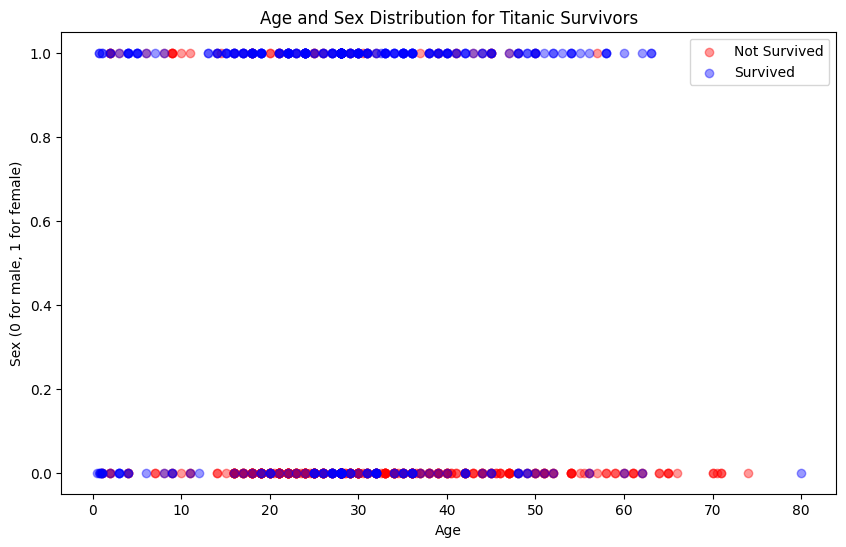

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# 创建逻辑回归模型
model = LogisticRegression()

# 训练模型
model.fit(X_train, y_train)

# 绘制图形
plt.figure(figsize=(10, 6))

# 画出幸存者和未幸存者的年龄分布
plt.scatter(X_train[y_train == 0]['Age'], X_train[y_train == 0]['Sex'], alpha=0.4, label='Not Survived', color='red')
plt.scatter(X_train[y_train == 1]['Age'], X_train[y_train == 1]['Sex'], alpha=0.4, label='Survived', color='blue')

# 添加图例和标签
plt.xlabel('Age')
plt.ylabel('Sex (0 for male, 1 for female)')
plt.title('Age and Sex Distribution for Titanic Survivors')
plt.legend()

# 显示图形
plt.show()

In [ ]:
# 创建并训练逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)

# 预测测试数据集
y_pred = model.predict(X_test)

# 创建输出DataFrame
output_df = pd.DataFrame({
    'PassengerId': test_df['PassengerId'],
    'Survived': y_pred
})

# 保存为CSV文件
output_file_path = 'submission.csv' 
output_df.to_csv(output_file_path, index=False)

print(f'Predictions saved to {output_file_path}')

Predictions saved to submission.csv
